## MNIST Prediction - having a go with Tensor Flow

This is basically just a rebuild of Yassine Ghouzam's kernal Introduction to CNN Keras

##### Importing libraries

In [1]:
import os                       # File system manangement

import numpy             as np  # scientific computing
import pandas            as pd  # data managment and analysis

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt # Matplotlib pyplot for plots
import matplotlib.image  as img 
import seaborn           as sns # Seabourne for visualization
import cv2

import tensorflow as tf
from tensorflow.keras.models                import Model, Sequential
from tensorflow.keras.layers                import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers            import RMSprop
from tensorflow.keras.preprocessing.image   import ImageDataGenerator
from tensorflow.keras.callbacks             import ReduceLROnPlateau

from keras_radam.training import RAdamOptimizer

C:\Users\jakec\AppData\Local\Continuum\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jakec\AppData\Local\Continuum\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jakec\AppData\Local\Continuum\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C

##### Setting options

In [2]:
pd.set_option('display.max_columns', 300) # Columns to Display
sns.set_style('white')                    # Plot style
random_seed = 42

###### Importing data

In [3]:
# Setting directory
os.chdir('C:/Users/jakec/my_projects/MNIST')
# Viewing datasets in the datastore
os.listdir('C:/Users/jakec/my_projects/MNIST')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'data',
 'MNIST.ipynb',
 'README.md']

In [4]:
# Importing training set
train = pd.read_csv('data/train.csv')
train.shape

(42000, 785)

In [5]:
# Importing testing set
test = pd.read_csv('data/test.csv')
test.shape

(28000, 784)

In [6]:
# Assigning the target variable
target = train.label
target.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [7]:
# Droping the tagret from the training set
train = train.drop(columns='label')
train.shape

(42000, 784)

#### Exploring data

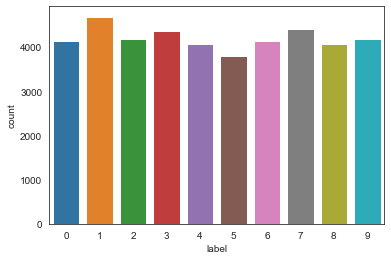

In [8]:
# Plotting target variables
sns.countplot(target)

In [9]:
train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,...,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42

In [10]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

#### Engineering

In [11]:
# Normalizing
train = train/255
test = test/255

In [12]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
train = train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [13]:
target = pd.get_dummies(target).values
target.shape

(42000, 10)

In [14]:
# Splitting out validation
train, train_val, target, target_val = train_test_split(train, target, test_size = 0.05, random_state=random_seed)

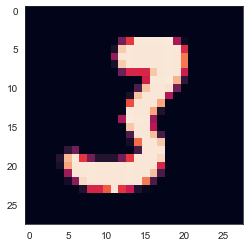

In [15]:
plt.imshow(train[0][:,:,0])

In [16]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
model = Sequential([
    Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (28,28,1)),
    Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.5),
    
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'),
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.5),

    Flatten(),
    Dense(256, activation = "relu"),
    Dropout(0.5),
    BatchNormalization(),
    Dense(10, activation = "softmax")
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
# Define the optimizer
optimizer = RAdamOptimizer(warmup_proportion=0.1, min_lr=1e-5)
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [18]:
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [19]:
# # Set a learning rate annealer
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
#                                             patience=3, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=0.00001)

In [20]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(train)

In [21]:
# Fit the model
history = model.fit_generator(datagen.flow(train, target, batch_size=256),
                              epochs = 50, validation_data = (train_val, target_val),
                              verbose = 1
#                               , steps_per_epoch=train.shape[0] // batch_size
#                               , callbacks=[learning_rate_reduction]
                             )

Epoch 1/50
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
156/156 [==============================] - 105s 673ms/step - loss: 1.7149 - acc: 0.4297 - val_loss: 1.6515 - val_acc: 0.9005
Epoch 2/50
156/156 [==============================] - 103s 661ms/step - loss: 0.4623 - acc: 0.8598 - val_loss: 0.4711 - val_acc: 0.9662
Epoch 3/50
156/156 [==============================] - 110s 705ms/step - loss: 0.2476 - acc: 0.9258 - val_loss: 0.0808 - val_acc: 0.9824
Epoch 4/50
156/156 [==============================] - 108s 694ms/step - loss: 0.1723 - acc: 0.9487 - val_loss: 0.0501 - val_acc: 0.9838
Epoch 5/50
156/156 [==============================] - 111s 713ms/step - loss: 0.1438 - acc: 0.9564 - val_loss: 0.0393 - val_acc: 0.9852
Epoch 6/50
156/156 [==============================] - 113s 725ms/step - loss: 0.1239 - acc: 0.9641 - val_loss: 0.0368 - val_acc: 0.9886
Epoch 7/50
156/156 [==============================] - 114s 731ms/step - loss: 0.1078 - acc

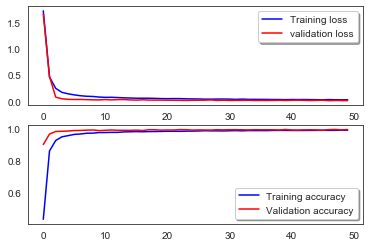

In [23]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

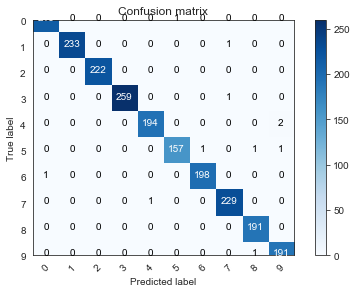

In [27]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
target_pred = model.predict(train_val)
# Convert predictions classes to one hot vectors 
target_pred_classes = np.argmax(target_pred, axis = 1) 
# Convert validation observations to one hot vectors
target_true = np.argmax(target_val, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(target_true, target_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

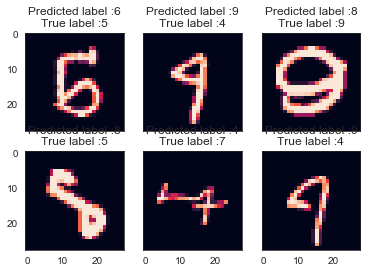

In [29]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (target_pred_classes - target_true != 0)

target_pred_classes_errors = target_pred_classes[errors]
target_pred_errors = target_pred[errors]
target_true_errors = target_true[errors]
train_val_errors = train_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
target_pred_errors_prob = np.max(target_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(target_pred_errors, target_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = target_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, train_val_errors, target_pred_classes_errors, target_true_errors)

In [30]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [32]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("data/submission.csv",index=False)